In [ ]:
!pip install colormaps cartopy gdown
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.util as cputil
import colormaps

import warnings
warnings.filterwarnings('ignore')

These exercises apply the methods demonstrated in the five introductory notebooks to aspects of the West African monsoon. Three sets of data files are provided, one for observations (CERES SYN1Deg and GPM IMERG), one for ERA5, and one for JRA-3Q:

In [ ]:
# Observations
!gdown {'1LP_poS2Sc1bFlctqHIRh9j8h5vAK2gBH'}
!gdown {'1yBWSyR6p7b5mbFyYaw0Y5-iXTRhFxU0B'}

# Reanalysis precipitation and OLR
!gdown {'1RnNiv4iTdQDOZYz6RCa8YznbWpW5vrwa'}
!gdown {'1X4iEDqSARpF8mWxrt8r2Zb1wk1qVgq7n'}
!gdown {'1ailuu8awjReWTzithgdo38T0hTeZRW34'}
!gdown {'1ARbfGEGGnexMUUyRD1IqbneM6aaQQNFL'}

# Reanalysis winds
!gdown {'1WUba4wF5uTVq4V_kaBZjNf-bv-bm-cGd'}
!gdown {'13h_UUFGwWd30f7v133ZQ6EqbMAlpJXc4'}

In [ ]:
obs = {}
obs['olr'] = xr.open_dataset('ceres_olr_1d_2001-2020.wam_grd.nc')['toa_lw_all_daily'].squeeze()
obs['prc'] = xr.open_dataset('imerg_v7_day_2001-2020.1x1.wam_grd.nc')['precipitation'].squeeze() # already in mm/day

In [ ]:
# Note: ERA5 fluxes are defined downward, so the sign of net longwave needs to be reversed
era5 = {}
era5['olr'] = -1*xr.open_dataset('ecmwf-era5_rlt_125.1d.2001-2020.wam_grd.nc')['MTNLWRF'].squeeze()
era5['prc'] = 86400*xr.open_dataset('ecmwf-era5_pr_125.1d.2001-2020.wam_grd.nc')['MTPR'].squeeze() # convert to mm/day
era5['u850'] = xr.open_dataset('ecmwf-era5_u850.1d.2001-2020.wam_grd.nc')['u'].squeeze()

In [ ]:
jra3q = {}
jra3q['olr'] = xr.open_dataset('jma-jra3q_rlut_125.1d.2001-2020.wam_grd.nc')['ulwrf1have-toa-fc-ll125'].squeeze()
jra3q['prc'] = 86400*xr.open_dataset('jma-jra3q_pr_125.1d.2001-2020.wam_grd.nc')['tprate1have-sfc-fc-ll125'].squeeze() # mm/day
jra3q['u850'] = xr.open_dataset('jma-jra3q_ua850_125.1d.2001-2020.wam_grd.nc')['ugrd-pres-an-ll125'].squeeze()

Start by plotting the observed distributions of precipitation and OLR during May, limiting the range of the plot to 30°W-30°E and 5°S-30°N (see example below). The data are provided as monthly means, so you will need to select only those days during May and average over time. Add lines to indicate 10°W and 10°E and a box to indicate the boundaries of 10°W to 10°E and 7°N to 17°N.

In [ ]:
# maps of mean precipitation and OLR for May 2001-2020

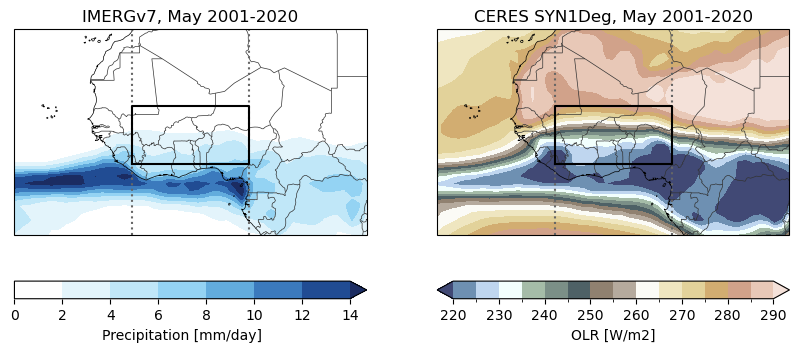


The next step is to evaluate each reanalysis. Plot spatial distributions of the difference between each reanalysis product and the observational benchmark. Which of these reanalyses better matches these observations? Is the answer the same for both variables? How could you quantify this agreement?

In [ ]:
# ERA5 minus IMERG (precipitation) and ERA5 minus CERES (OLR)

In [ ]:
# JRA-3Q minus IMERG (precipitation) and JRA-3Q minus CERES (OLR)

Next, compare the difference in 850hPa zonal wind for June minus April for both ERA5 and JRA-3Q. Do the reanalyses show better agreement on this large-scale circulation field?

In [ ]:
# ERA5 and JRA-3Q lat-lon distributions of zonal winds at 850 hPa

Try repeating the analysis for other months or seasons. What is your overall impression of their suitability for evaluating the changes in circulation and water cycle variables around monsoon onset?